In [3]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# added these dependencies
import json
import scipy.stats as st
from pprint import pprint
#this was already here
from scipy.stats import linregress

#Covid border shutdown : february 28-march 26, 2020
start_date = "2020-02-28"
end_date = "2020-03-26"

# URL for GET requests to retrieve vehicle data
url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-12-31"
default = "start=2020-01-01&end=2020-12-31" 

# import the DOW csv file
file_to_load = "data/DJIA.csv"
dow_prices = pd.read_csv(file_to_load)
dow_prices_df = pd.DataFrame(dow_prices)

# import the GOLD csv file
file_to_load = "data/Gold.csv"
gold_prices = pd.read_csv(file_to_load)
gold_prices_df = pd.DataFrame(gold_prices)
gold_prices_df.columns = gold_prices_df.columns.tolist()[:1] + ['Close'] + gold_prices_df.columns.tolist()[2:]


In [4]:
query_url = f'{url}start={start_date}&end={end_date}'

pprint(requests.get(query_url).json())

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [48]:
# bitcoin make the data frame for covid dates
response = requests.get(query_url).json()
my_dict = response['bpi']
bitcoin_df = pd.DataFrame(list(my_dict.items()),columns = ['close date','close price'])
bitcoin_df['close date'] = pd.to_datetime(bitcoin_df['close date'])
bitcoin_df

,close date,close price
0,2020-01-01,7188.4633
1,2020-01-02,6961.5683
2,2020-01-03,7346.5800
3,2020-01-04,7355.8550
4,2020-01-05,7356.3117
...,...,...
81,2020-03-22,5803.6700
82,2020-03-23,6492.9400
83,2020-03-24,6766.7817
84,2020-03-25,6687.7050


In [49]:
# djia make the data frame for covid dates
dow_prices_df['DATE'] = pd.to_datetime(dow_prices_df['DATE'])

dow_cleaned = dow_prices_df.loc[(dow_prices_df['DATE'] >= start_date) & (dow_prices_df['DATE'] <= end_date)]
dow_cleaned = dow_cleaned.sort_values(by=['DATE']).reset_index(drop=True)
dow_cleaned = dow_cleaned.iloc[:,0:2]

# rename date column to prep for merge
dow_df = dow_cleaned.rename(columns={'DATE':'close date','DJIA':'close price'})

dow_df

,close date,close price
0,2020-02-28,25409.36
1,2020-03-02,26703.32
2,2020-03-03,25917.41
3,2020-03-04,27090.86
4,2020-03-05,26121.28
5,2020-03-06,25864.78
6,2020-03-09,23851.02
7,2020-03-10,25018.16
8,2020-03-11,23553.22
9,2020-03-12,21200.62


In [62]:
# gold make the data frame for gold dates
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df['Date'])

gold_cleaned = gold_prices_df.loc[(gold_prices_df['Date'] >= start_date) & (gold_prices_df['Date'] <= end_date)]
gold_cleaned = gold_cleaned.sort_values(by=['Date']).reset_index(drop=True)
gold_cleaned = gold_cleaned.iloc[:,0:2]

# rename date column to prep for merge
gold_df = gold_cleaned.rename(columns={'Date':'close date','Close Last':'close price'})

gold_df

,close date,Close
0,2020-02-28,1564.1
1,2020-03-02,1592.3
2,2020-03-03,1642.1
3,2020-03-04,1643.0
4,2020-03-05,1666.4
5,2020-03-06,1672.4
6,2020-03-09,1675.7
7,2020-03-10,1659.1
8,2020-03-11,1642.3
9,2020-03-12,1590.3


In [77]:
# merging all three data sources into one
merged_df = dow_df.merge(bitcoin_df, on='close date', how='outer')
merged_df = merged_df.rename(columns={'close price_x':'Dow close','close price_y':'Bitcoin close'})
merged_df = merged_df.dropna()
merged_df

,close date,Dow close,Bitcoin close
0,2020-02-28,25409.36,8715.6617
1,2020-03-02,26703.32,8926.2517
2,2020-03-03,25917.41,8768.1800
3,2020-03-04,27090.86,8767.8867
4,2020-03-05,26121.28,9073.2750
5,2020-03-06,25864.78,9165.1517
6,2020-03-09,23851.02,7944.4500
7,2020-03-10,25018.16,7899.2267
8,2020-03-11,23553.22,7951.1700
9,2020-03-12,21200.62,4914.0850


In [78]:
# merging all three data sources into one
merged_all_df = merged_df.merge(gold_df, on='close date', how='outer')
merged_all_df = merged_all_df.rename(columns={'Close':'Gold close'})
merged_all_df = merged_all_df.dropna()
merged_all_df

,close date,Dow close,Bitcoin close,Gold close
0,2020-02-28,25409.36,8715.6617,1564.1
1,2020-03-02,26703.32,8926.2517,1592.3
2,2020-03-03,25917.41,8768.1800,1642.1
3,2020-03-04,27090.86,8767.8867,1643.0
4,2020-03-05,26121.28,9073.2750,1666.4
5,2020-03-06,25864.78,9165.1517,1672.4
6,2020-03-09,23851.02,7944.4500,1675.7
7,2020-03-10,25018.16,7899.2267,1659.1
8,2020-03-11,23553.22,7951.1700,1642.3
9,2020-03-12,21200.62,4914.0850,1590.3


In [79]:
# consulted Chelsea's graph for this part - setting axes to variables
bitcoin_x = merged_all_df['Bitcoin close']
dow_x = merged_all_df['Dow close']
gold_x = merged_all_df['Gold close']
all_y = merged_all_df['close date']

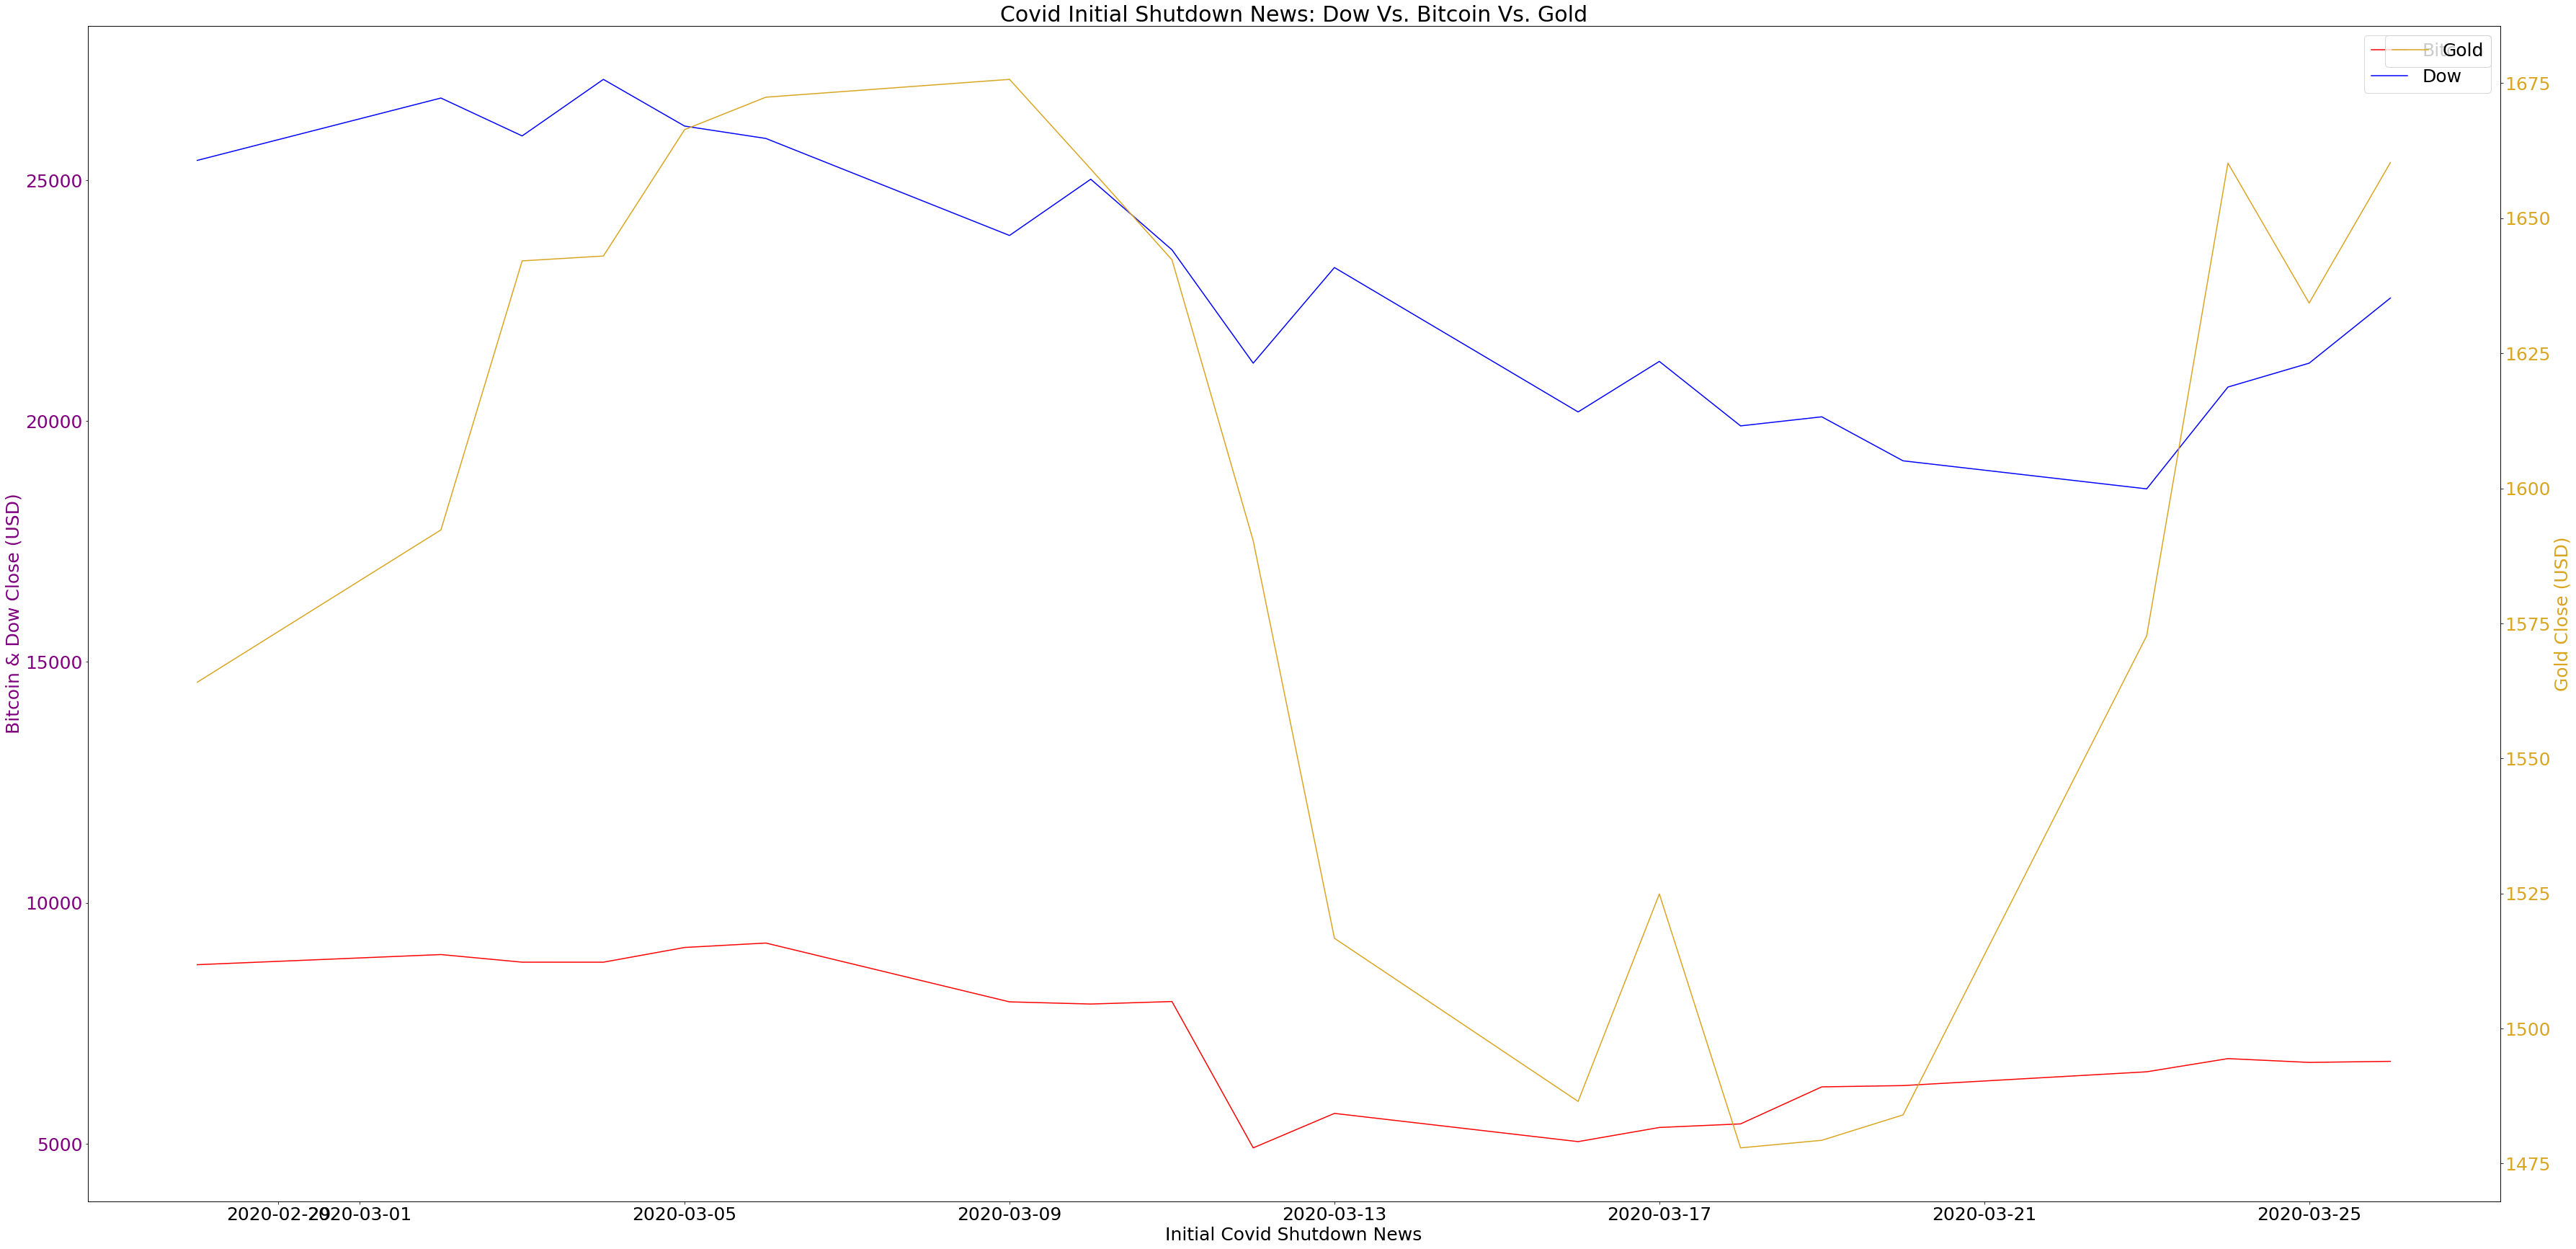

In [84]:
#Better Chart with 2 axis
fig, ax1 = plt.subplots()
color_bit ='red'
color_dow = 'blue'
color_gold = 'goldenrod'
color_label = 'purple'
ax1.set_xlabel('Initial Covid Shutdown News')
ax1.set_ylabel('Bitcoin & Dow Close (USD)', color =color_label)
ax1.plot(merged_all_df['close date'], merged_all_df['Bitcoin close'], color=color_bit, Label='Bitcoin')
ax1.plot(merged_all_df['close date'],merged_all_df['Dow close'],color=color_dow, Label='Dow')
ax1.tick_params(axis='y', labelcolor=color_label)
ax2=ax1.twinx()
ax2.set_ylabel('Gold Close (USD)', color =color_gold)
ax2.plot(merged_all_df['close date'],merged_all_df['Gold close'],color=color_gold, Label='Gold')
ax2.tick_params(axis='y', labelcolor=color_gold)
#Title Clean up
plt.title("Covid Initial Shutdown News: Dow Vs. Bitcoin Vs. Gold")
plt.rcParams["figure.figsize"] = (60,30)
plt.rcParams.update({'font.size': 25})
#Legend Clean up
ax1.legend(loc=0)
ax2.legend(loc=0)
plt.show()

In [70]:
merged_all_df.describe()

,Dow close,Bitcoin close,Gold close
count,20.000000,86.000000,20.000000
mean,22877.560000,8383.921629,1592.225000
std,2740.331736,1414.275491,73.303212
min,18591.930000,4914.085000,1477.900000
25%,20575.812500,7837.499150,1522.850000
50%,22868.895000,8722.258300,1613.300000
75%,25523.215000,9392.120400,1659.375000
max,27090.860000,10356.756700,1675.700000
